Kuzminov Artem

Task 2 - Run a Random Forest.

You will need to perform a random forest analysis to evaluate the importance of a series of explanatory variables in predicting a binary, categorical response variable.

In [3]:
#Importing libraries
from sklearn.model_selection import train_test_split
import pandas
import numpy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

I will use data set about occupancy detection of an office room from light, temperature, humidity and CO2 measurements. The link to the data set: https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

**Attribute Information**

Explanatory variables:
- date time year-month-day hour:minute:second
- Temperature, in Celsius
- Relative Humidity, %
- Light, in Lux
- CO2, in ppm
- Humidity Ratio, Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air

Response variable:
- Occupancy, 0 or 1, 0 for not occupied, 1 for occupied status

In [4]:
#Data loading
data = pandas.read_csv("datatest.csv")
data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [5]:
#Data preparation
data = data.drop("date", axis = 1)
df_X = data.drop("Occupancy", axis = 1)
y = data["Occupancy"]

X_train, X_test, y_train, y_test = train_test_split(df_X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1998, 5) (667, 5) (1998,) (667,)


In [40]:
#Fitting the model
rand_trees = RandomForestClassifier(n_estimators=2)
rand_trees.fit(X_train, y_train)
y_pred = rand_trees.predict(X_test)

In [41]:
#Checking metrics
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)
acc = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(acc))

Confusion matrix:
 [[423   6]
 [  8 230]]
Accuracy: 0.9790104947526237


The model fitted well, scores are good. Let's change hyperparameters to improve model performance.
I will use GridSearchCV. GridSearchCV is a useful tool for fiting multiple models to find best set of hyperparameters.

In [74]:
#Prepare linspaces for GridSearch CV
estimators_number_space = numpy.linspace(1, 100, 10).astype(int)
max_depth_space = numpy.linspace(1, 5, 5)
rand_trees_new = RandomForestClassifier()

param_grid = dict(n_estimators = estimators_number_space,max_depth = max_depth_space)
grid_lin = GridSearchCV(rand_trees_new, param_grid= param_grid,error_score=accuracy_score)

grid_lin.fit(X_train,y_train)
grid_lin.best_estimator_

C:\Users\Kuzminov Artem\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5.0, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=34,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
#Checking metrics
y_pred = grid_lin.best_estimator_.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)
acc = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(acc))

Confusion matrix:
 [[417  12]
 [  0 238]]
Accuracy: 0.9820089955022488


The accuracy score is higher (0.982 > 0.979), and number of type 2 erros is 0 (which is good)

In [155]:
def plot1(gridcv,a,b,c,max_depth):
    plt.subplot(a,b,c)
    plt.title("With max_depth = " + str(max_depth))
    plt.plot(numpy.linspace(1, 100, 10).astype(int), gridcv,'-o')
    plt.grid(True)
    
    for x,y in zip(numpy.linspace(1, 100, 10).astype(int),gridcv):
        label="{:.5f}".format(y)
        plt.annotate(label,
                     (x,y),
                     textcoords="offset points", 
                     xytext=(0,10),
                     ha='center')
    
    plt.xticks(numpy.linspace(1, 100, 10).astype(int))
    plt.yticks(numpy.arange(0.95,1,0.005))

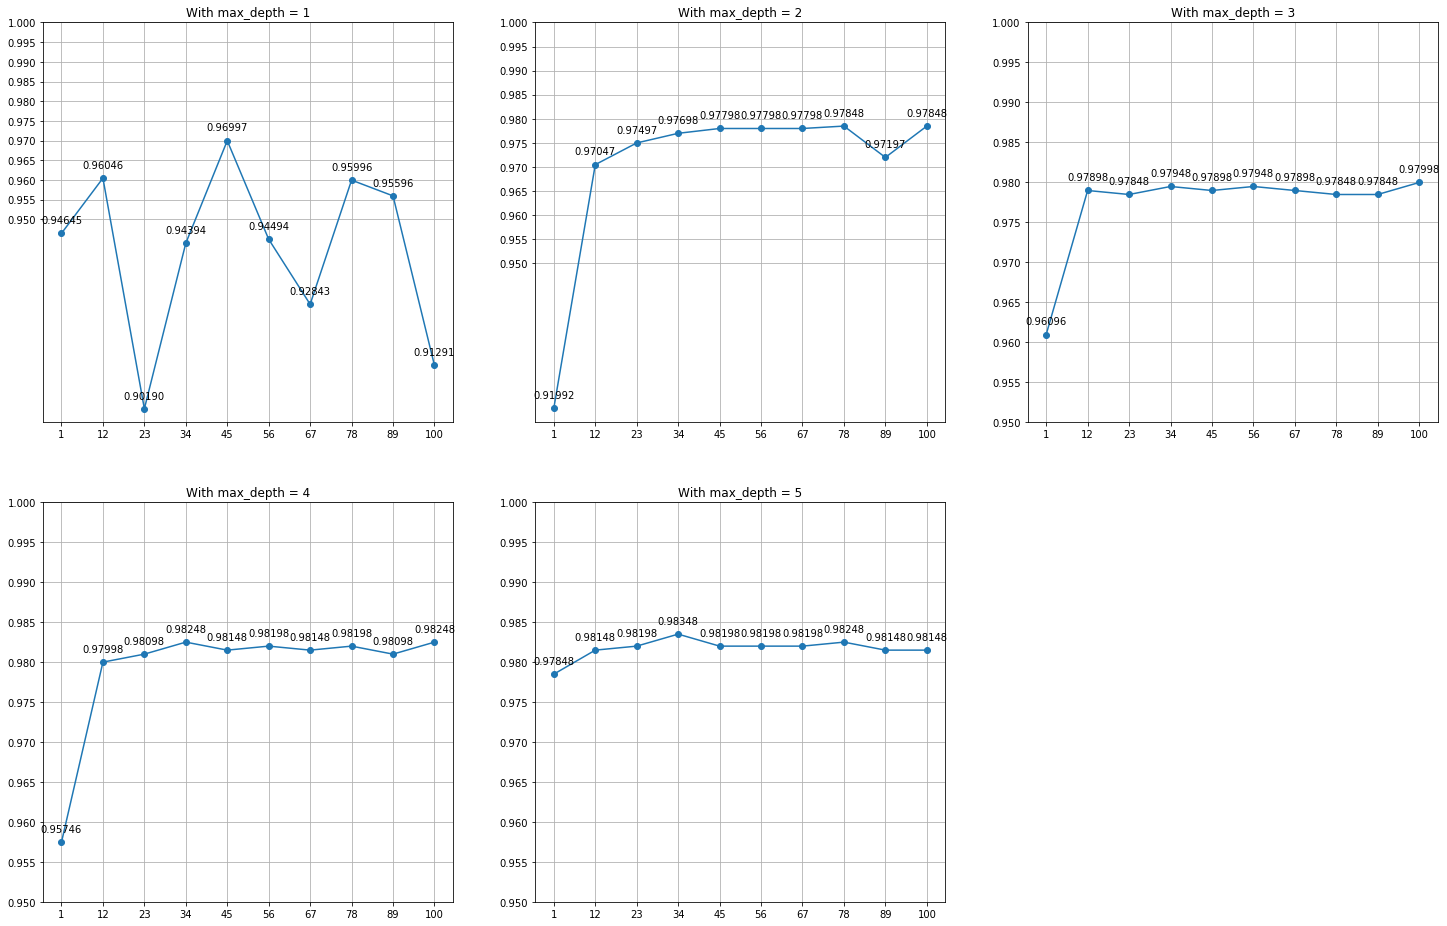

In [156]:
plt.figure(figsize=[25,25])

plot1(grid_lin.cv_results_['mean_test_score'][:10],3,3,1,1)
plot1(grid_lin.cv_results_['mean_test_score'][10:20],3,3,2,2)
plot1(grid_lin.cv_results_['mean_test_score'][20:30],3,3,3,3)
plot1(grid_lin.cv_results_['mean_test_score'][30:40],3,3,4,4)
plot1(grid_lin.cv_results_['mean_test_score'][40:],3,3,5,5)

plt.show()

It is clear, that the best max_depth is 5 for all variants of n_estimators. 34 is the best variant for n_estimators, so more trees in the random forest doesn't imply better score.

To understand the importance of explanatory variables in predicting the response variable, I will use default functionality of Random Forest: feature_importances_ field.

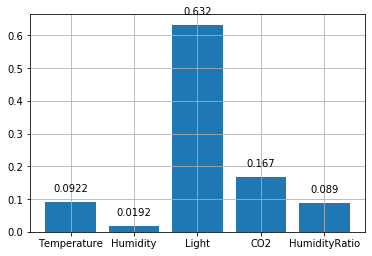

In [179]:
features = ["Temperature","Humidity","Light","CO2","HumidityRatio"]

plt.bar(features,grid_lin.best_estimator_.feature_importances_)
plt.grid(True)
for x,y in zip(features,grid_lin.best_estimator_.feature_importances_):

    label = "{:.3}".format(y)

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')

plt.show()

It is clear that Light explains office occupation better than other, also CO2 level and temperature are valuable for office occupation